# Parallel experiments in 8 schools

In [ ]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
schools = ["A", "B", "C", "D", "E", "F", "G", "H"]
treatment = [28, 8, -3, 7, -1, 1, 18, 12]
sde = [15, 10, 16, 11, 9, 11, 10, 18]

Model:
$$
\begin{align}
p(\tau) & \sim \chi^{-2}(\nu_0, \tau_0^2) \\
p(\mu | \tau) & \sim \text{N}(\mu_o, \tau^2 / \kappa_0) \\
p(\theta_s | \mu, \tau) & \sim \text{N}(\mu, \tau^2) \\ 
p(y_s | \theta_s) & \sim \text{N}(\theta_s, \sigma_s^2 )
\end{align}
$$

In [16]:
coords = {"schools": schools}

with pm.Model(coords=coords) as m:
    tau = pm.HalfNormal("tau", sigma=10.0)
    mu = pm.Normal("mu", mu=0, sigma=3.0)
    thetas = pm.Normal("theta", mu=mu, tau=tau, dims="schools")
    pm.Normal("scores", mu=thetas, tau=sde, observed=treatment, dims="schools")

    trace = pm.sample(2000, tune=1000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu, theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


In [17]:
az.summary(trace, var_names="theta")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta[A],27.984,0.256,27.514,28.468,0.002,0.003,11472.0,6167.0,1.0
theta[B],7.994,0.311,7.417,8.565,0.003,0.004,13359.0,5953.0,1.0
theta[C],-2.992,0.249,-3.450,-2.520,0.002,0.003,11910.0,6048.0,1.0
theta[D],6.996,0.292,6.432,7.528,0.003,0.003,12234.0,5860.0,1.0
theta[E],-0.997,0.323,-1.599,-0.387,0.003,0.004,12560.0,6578.0,1.0
theta[F],1.003,0.298,0.454,1.567,0.003,0.004,11661.0,6278.0,1.0
theta[G],17.985,0.313,17.424,18.585,0.003,0.004,12240.0,6096.0,1.0
theta[H],11.998,0.234,11.583,12.452,0.002,0.003,10635.0,5801.0,1.0


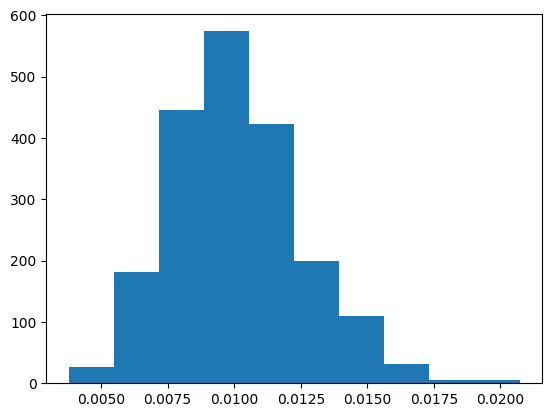

In [18]:
plt.hist(trace.posterior["tau"].mean("chain"))
plt.show()